# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Fall 2019

### Part I: Hybrid Images

In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal
import scipy

import utils
from PIL import Image


In [2]:
%matplotlib notebook

In [59]:
im1_file = './tarik.jpg'
im2_file = './amar.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


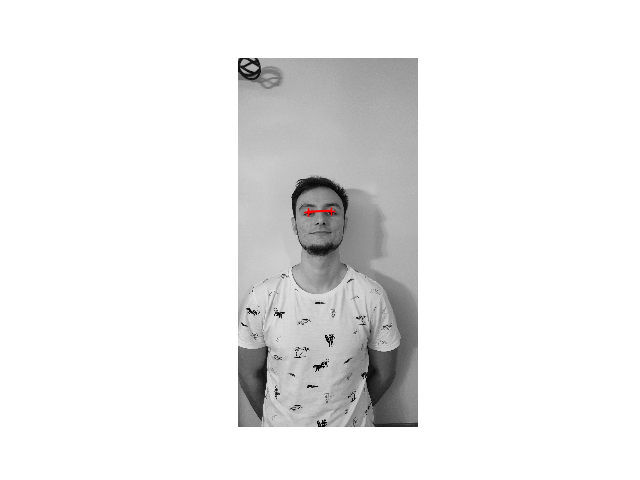

In [60]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


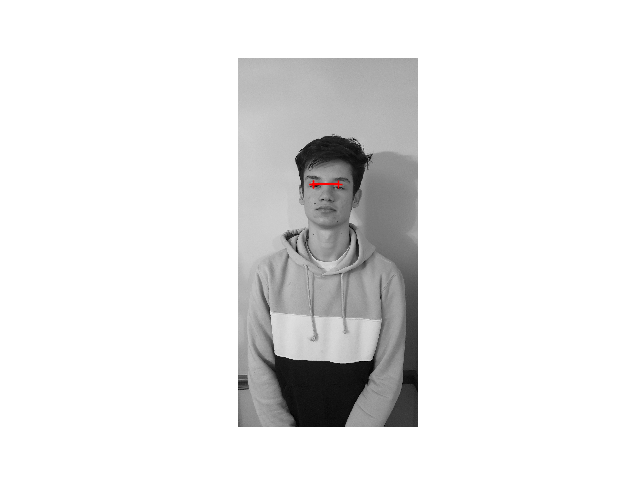

In [61]:
pts_im2 = utils.prompt_eye_selection(im2)

In [62]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [63]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


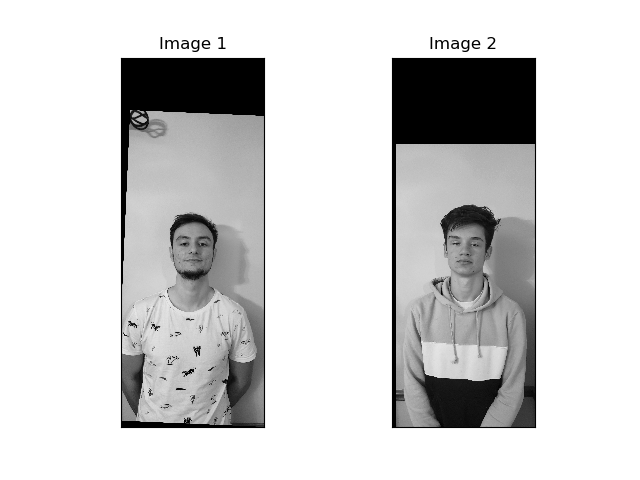

In [64]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [65]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    ''' 
    
    fil_high = utils.gaussian_kernel(cutoff_high, round(cutoff_high * 3))
    im_fil_2 = cv2.filter2D(im2,-1,fil_high)
    lp = im2 - im_fil_2
    
    fil_low = utils.gaussian_kernel(cutoff_low, round(cutoff_low * 3))
    im_fil_1 = cv2.filter2D(im1,-1,fil_low)

    

    hybrid = lp + im_fil_1
    
    return hybrid, lp, im_fil_1
    


In [74]:
arbitrary_value = 2  # you should choose meaningful values; you might want to set to a fraction of image size
cutoff_low = 7
cutoff_high = 12

hybrid,lp,gaus = hybridImage(im1, im2, cutoff_low, cutoff_high)

<IPython.core.display.Javascript object>


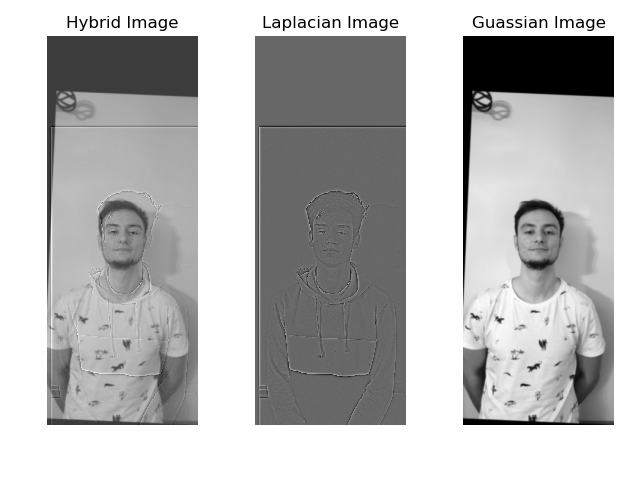

In [82]:

fig, axes = plt.subplots(1,3)
fig.tight_layout()
axes[0].imshow(hybrid, cmap='gray')
axes[1].imshow(lp, cmap='gray')
axes[2].imshow(gaus, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[0].title.set_text('Hybrid Image')
axes[1].title.set_text('Laplacian Image')
axes[2].title.set_text('Guassian Image')
plt.savefig('tarik_amar_compare.png')






<IPython.core.display.Javascript object>


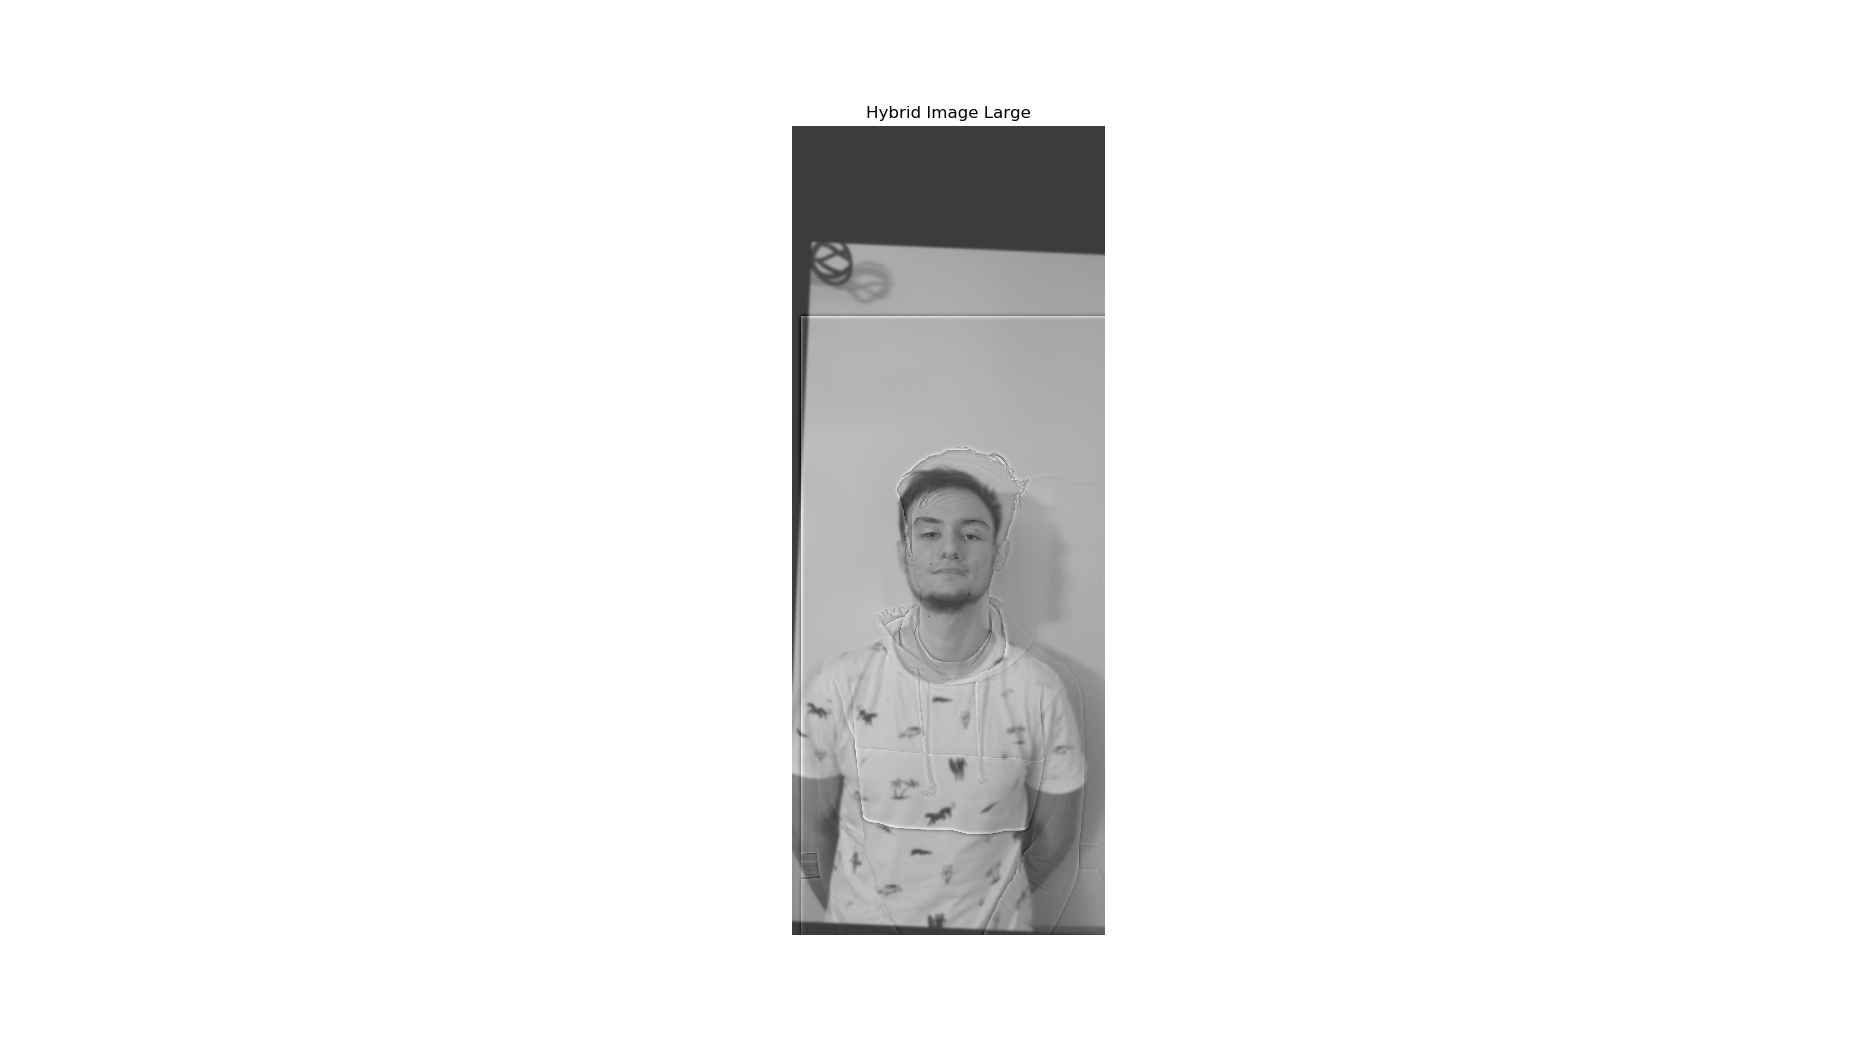

In [83]:
fig, axes = plt.subplots(1,1)
axes.imshow(hybrid, cmap='gray')
axes.axis('off')
axes.title.set_text('Hybrid Image Large')
fig.set_size_inches(18.5, 10.5)
plt.savefig('tarik_amar.png')

<IPython.core.display.Javascript object>


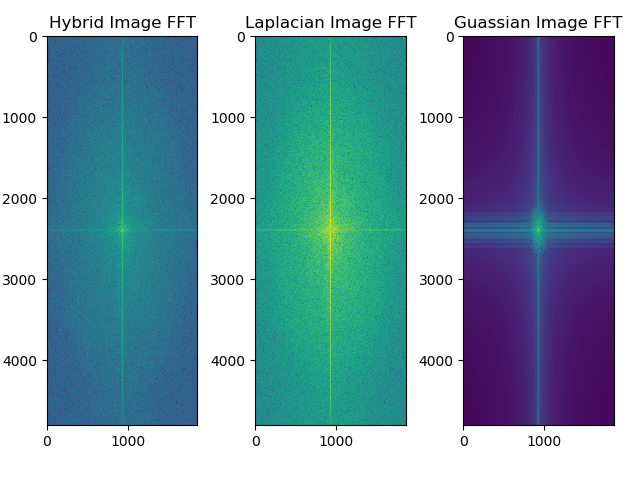

In [84]:
hybrid_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid))))
lp_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(lp))))
gaus_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gaus))))

fig, axes = plt.subplots(1,3)
fig.tight_layout()
axes[0].imshow(hybrid_fft)
axes[1].imshow(lp_fft)
axes[2].imshow(gaus_fft)
#axes[0].axis('off')
#axes[1].axis('off')
#axes[2].axis('off')
axes[0].title.set_text('Hybrid Image FFT')
axes[1].title.set_text('Laplacian Image FFT')
axes[2].title.set_text('Guassian Image FFT')
plt.savefig('tarik_amar_compare_fft.png')



### Part II: Image Enhancement

In [ ]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid[2])

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift

In [ ]:
np.real(-np.Inf+1)